In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [11]:
# Read pharmacy data

poland_boundary = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland.country.json")

pharmacies = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_pharmacies.geojson", columns=['id', 'name', 'geometry'])
hospitals = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_hospitals.geojson", columns=['id', 'name', 'geometry'])
nursing_home = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_nursing_home.geojson", columns=['id', 'name', 'geometry'])
worship = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_place_of_worship.geojson", columns=['id', 'name', 'geometry'])
schools = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_schools.geojson", columns=['id', 'name', 'geometry'])
universities = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_universities.geojson", columns=['id', 'name', 'geometry'])
dentists = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_dentists.geojson", columns=['id', 'name', 'geometry'])

pharmacies['type'] = 'pharmacy'
hospitals['type'] = 'hospital'
nursing_home['type'] = 'nursing_home'
worship['type'] = 'place_of_worship'
schools['type'] = 'school'
universities['type'] = 'university'
dentists['type'] = 'dentist'

gdf = pd.concat([pharmacies, hospitals, nursing_home, worship, schools, universities, dentists])

gdf = gpd.sjoin(gdf, poland_boundary[['geometry']], predicate='within').drop(columns=['index_right']).reset_index(drop=True)

gdf

,id,name,geometry,type
0,node/201780847,Apteka z uśmiechem,POINT (20.98358 52.20929),pharmacy
1,node/248566255,Ziko Apteka,POINT (21.05297 52.23803),pharmacy
2,node/248566269,Dbam o Zdrowie,POINT (21.08214 52.24574),pharmacy
3,node/260052918,Dbam o Zdrowie,POINT (21.00192 52.20694),pharmacy
4,node/260458574,Dbam o Zdrowie,POINT (21.04392 52.14537),pharmacy
...,...,...,...,...
22865,node/12026348370,Dentusplus,POINT (18.46673 54.47194),dentist
22866,node/12026722292,WWDent,POINT (20.64577 50.87294),dentist
22867,node/12028873057,Orto-Prot,POINT (15.19904 53.91412),dentist
22868,node/12029694537,Fudalej,POINT (21.02252 52.18507),dentist


<Axes: >

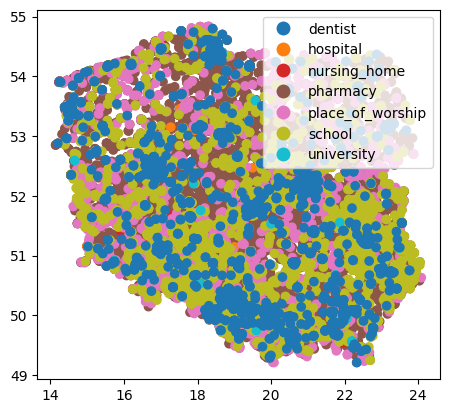

In [12]:
gdf.plot(column='type', legend=True)

In [13]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
gdf.to_file("C:/Users/alkaye/geodemographics-demonstrator/processed_data/osm_amenities_with_pharmacies.geojson")